# Problem Statement:

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Making Target Column
-- as per constraint:

-- taxable_income <= 30000 as "Risky" and others are "Good"

In [6]:
def Tagging(income):
    if income<= 30000:
        return "Risky"
    else:
        return "Good"

In [7]:
df['Target']=df['Taxable.Income'].apply(Tagging)

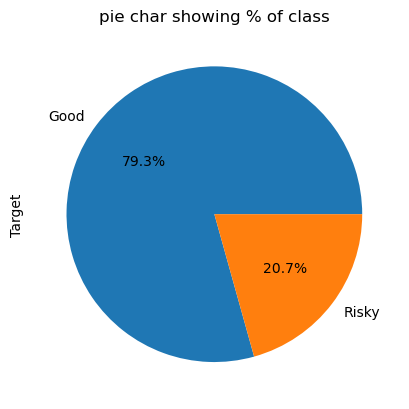

In [8]:
df['Target'].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title('pie char showing % of class')
plt.show()

In [9]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


### Checking for NAN and Duplicated Values

In [10]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Encoding

In [12]:
Objectcol=df.select_dtypes(object).columns
Objectcol

Index(['Undergrad', 'Marital.Status', 'Urban', 'Target'], dtype='object')

In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(dtype=int)

df[Objectcol]=oe.fit_transform(df[Objectcol])

In [14]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


[]

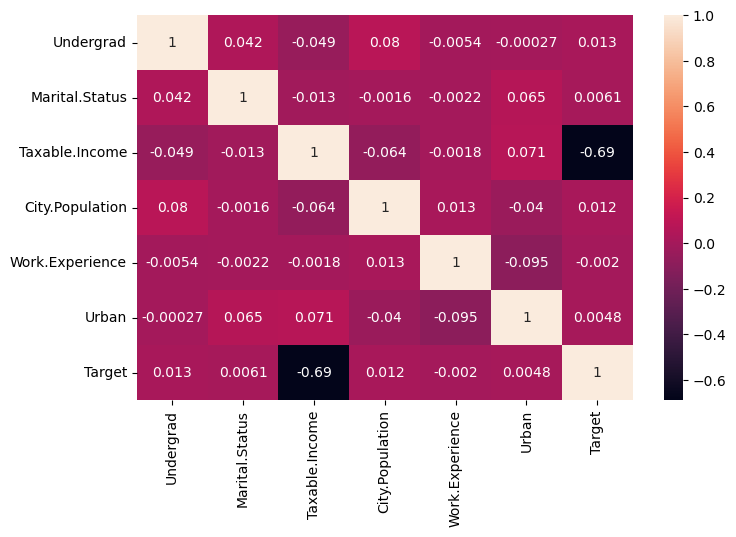

In [15]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.plot()

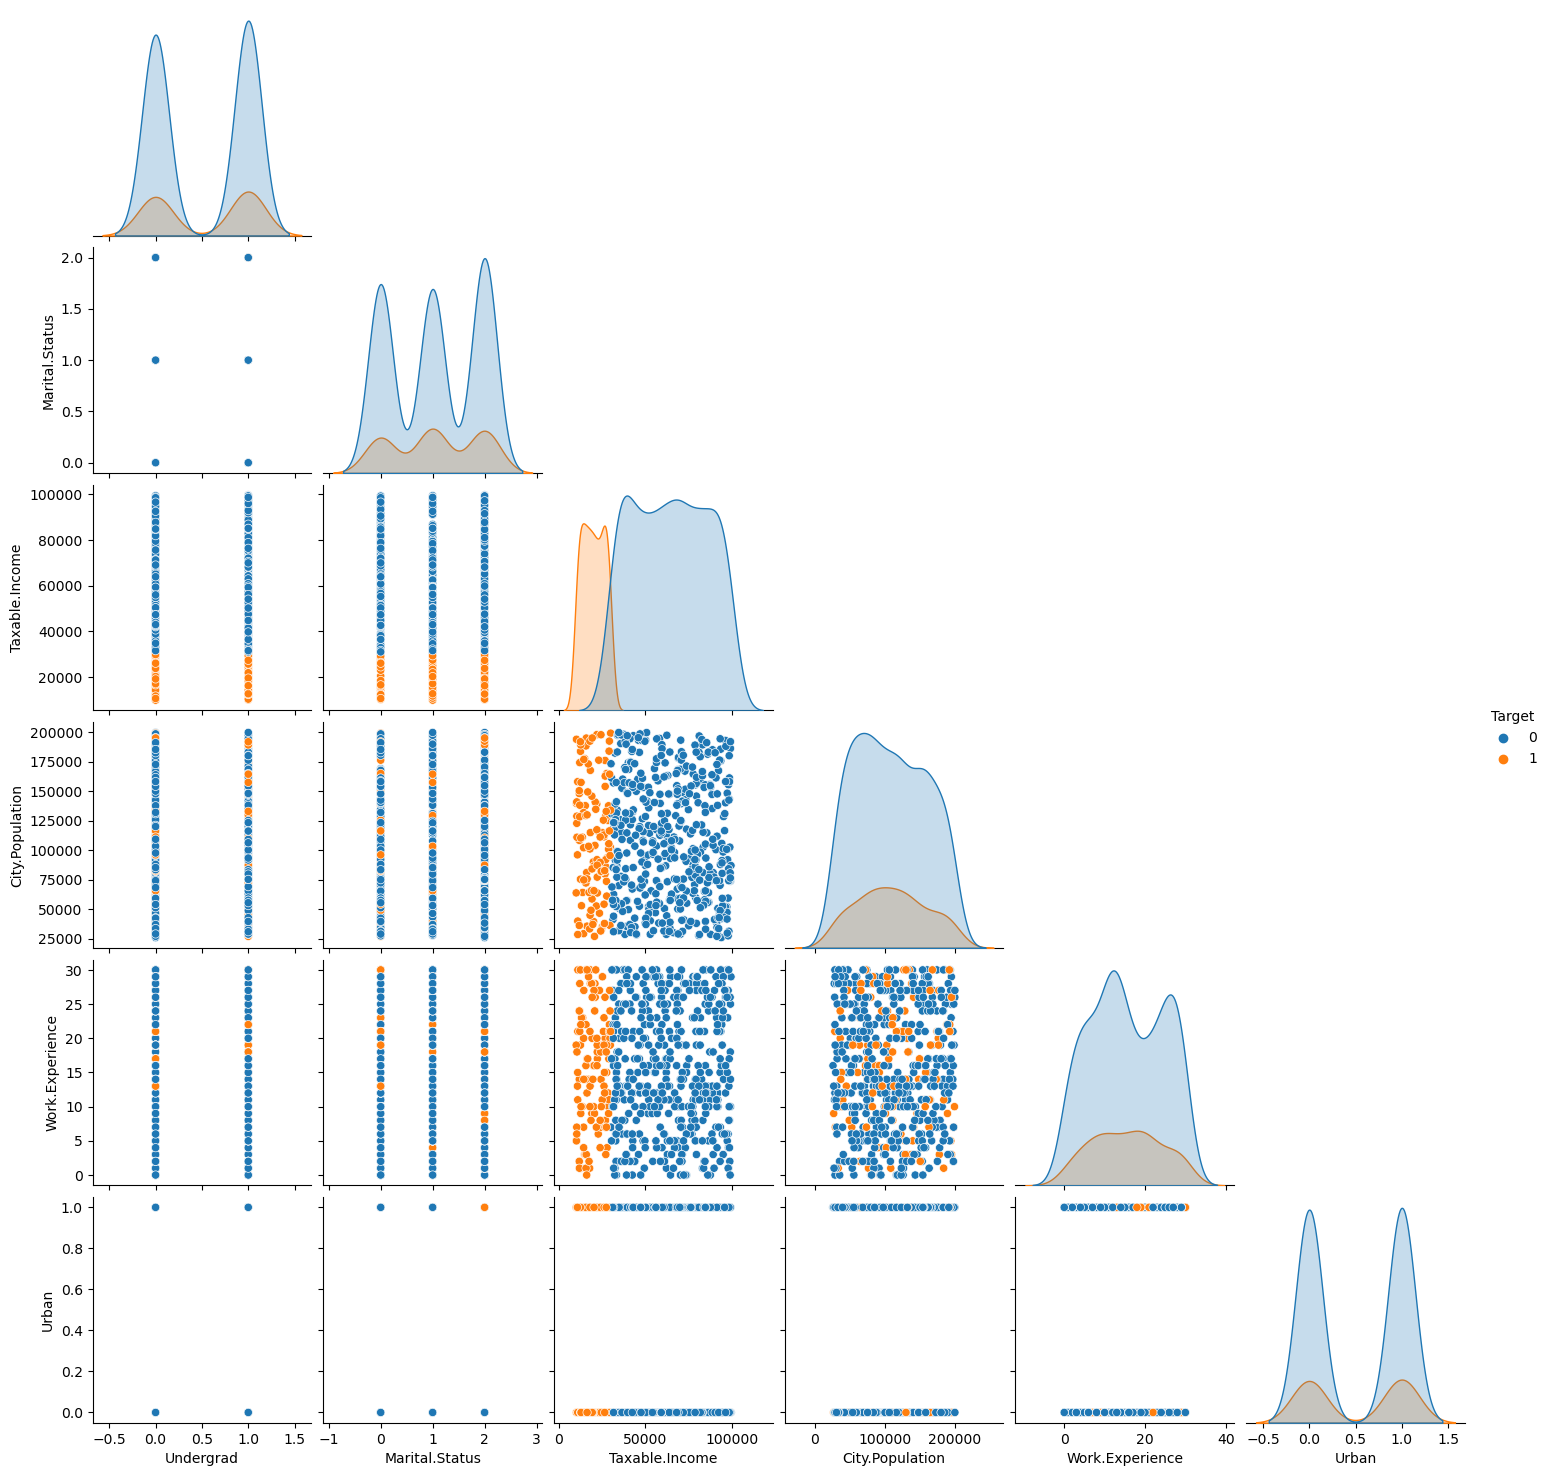

In [16]:
sns.pairplot(df,hue='Target',corner=True)

### Feature Selection

In [17]:
x=df.drop('Target',axis=1)
y=df['Target']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

### Evaluation

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,make_scorer

<Axes: >

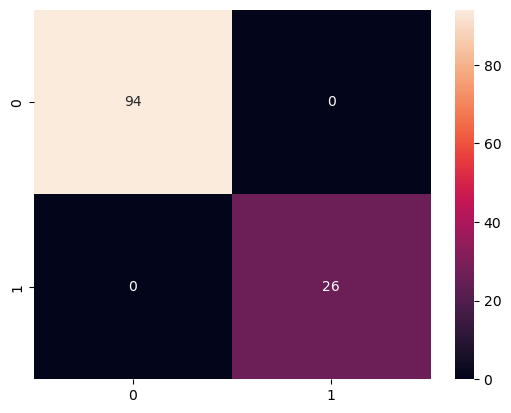

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [27]:
from sklearn.tree import plot_tree

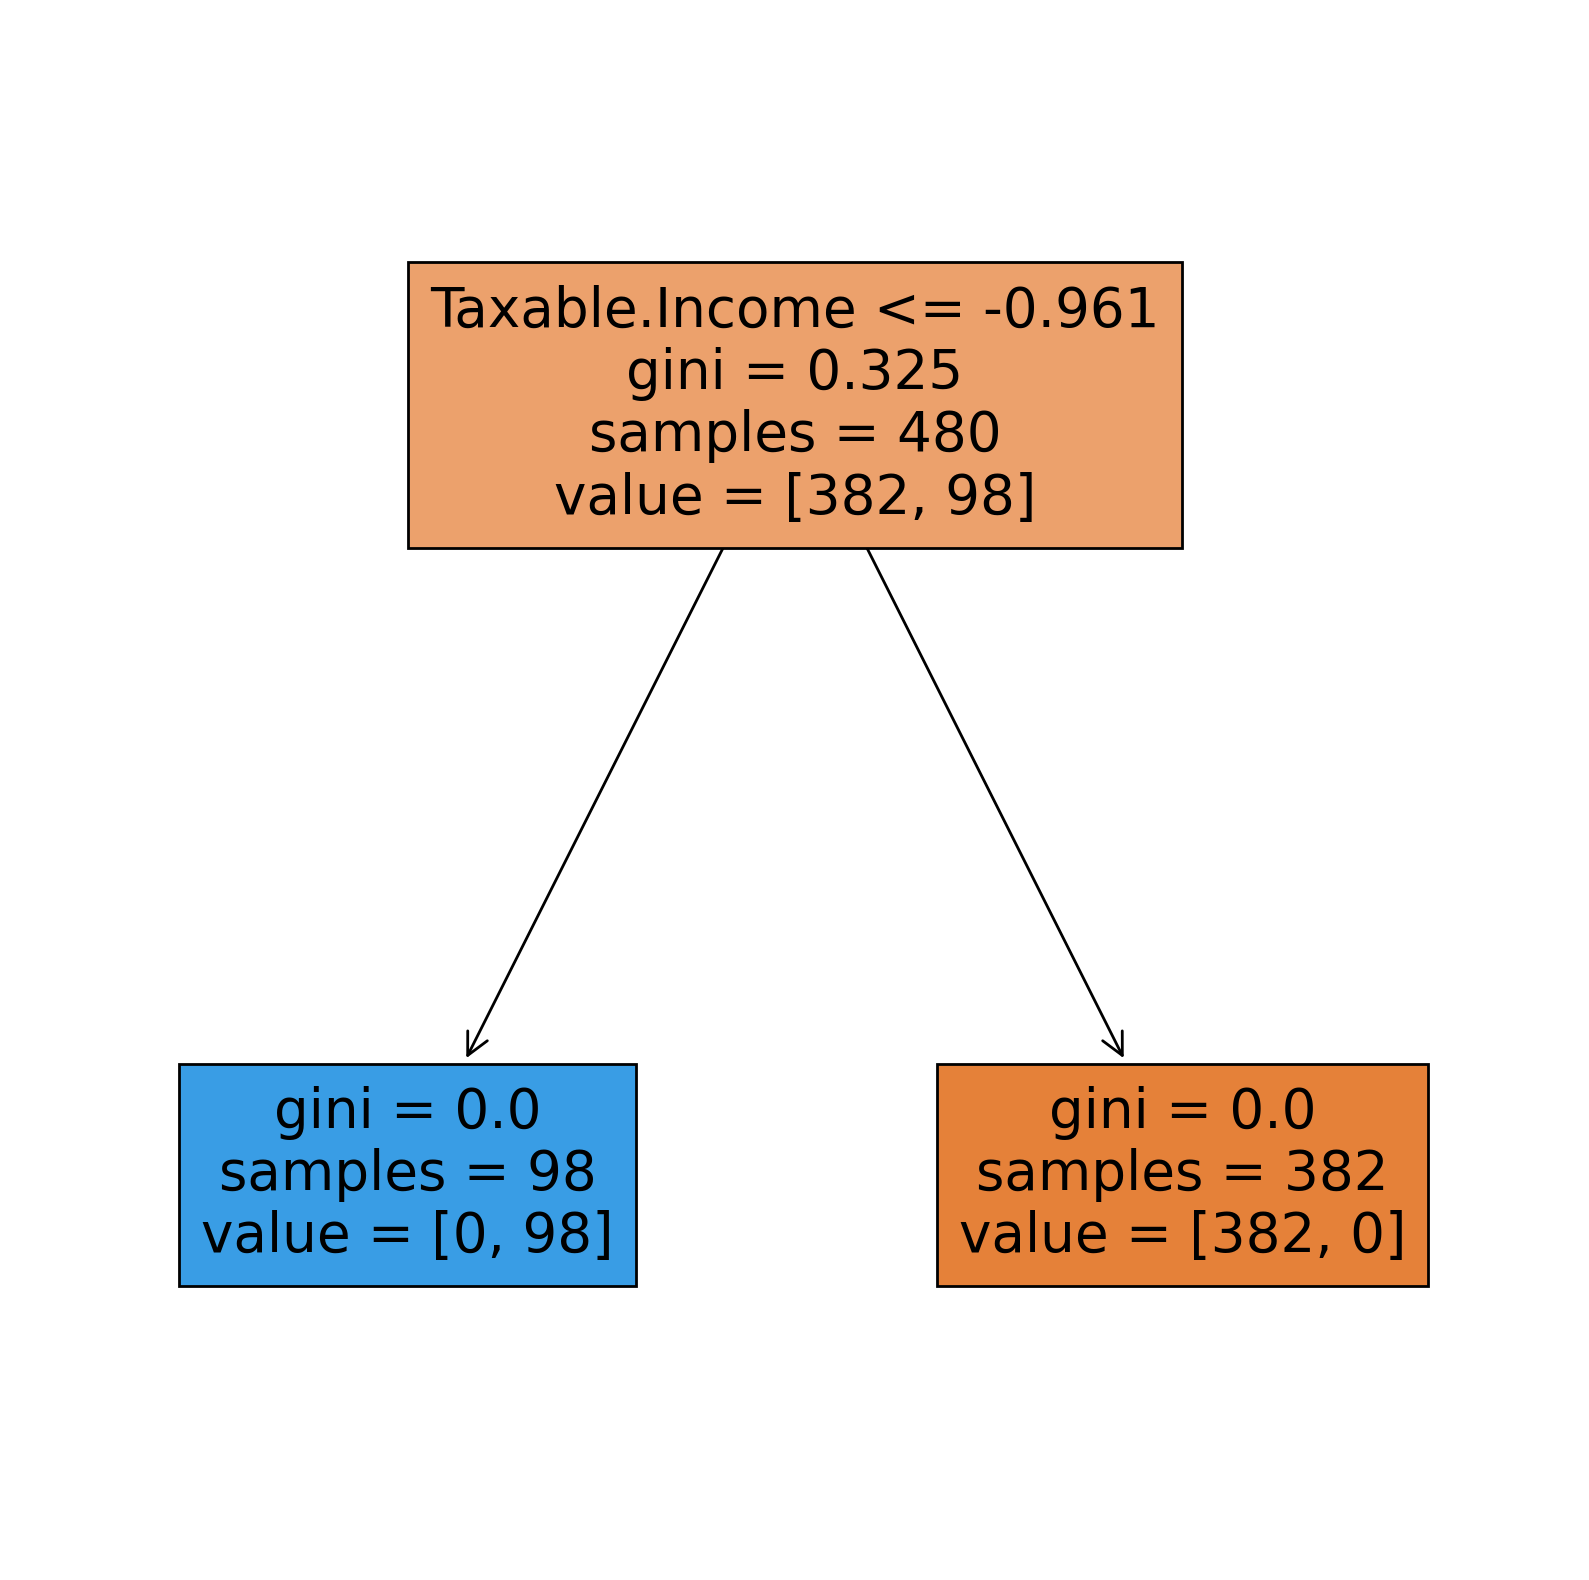

In [28]:
plt.figure(figsize=(10,10),dpi=200)
plot_tree(model,filled=True,feature_names=x.columns);

## Hyper Parameter Tunning

In [29]:
def report_model(model):
    model_preds = model.predict(X_test)
    train_Score=model.score(X_train,y_train)
    test_Score=model.score(X_test,y_test)
    
    print(f"train:-{train_Score}\ntest:- {test_Score}")
    print()
    print(sns.heatmap(confusion_matrix(y_test,model_preds),annot=True))
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=x.columns);

In [30]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

- The min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

- The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

- max_features : int, float or {"auto", "sqrt", "log2"}, default=None The number of features to consider when looking for the best split

train:-1.0
test:- 1.0

Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120





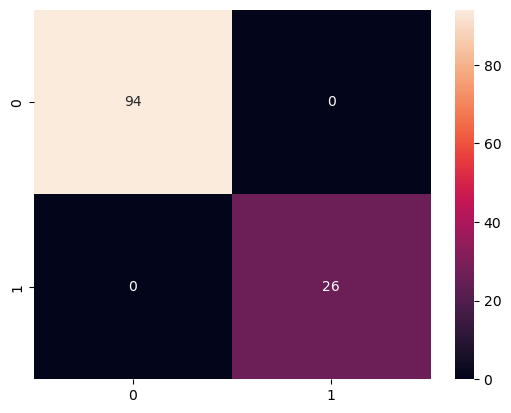

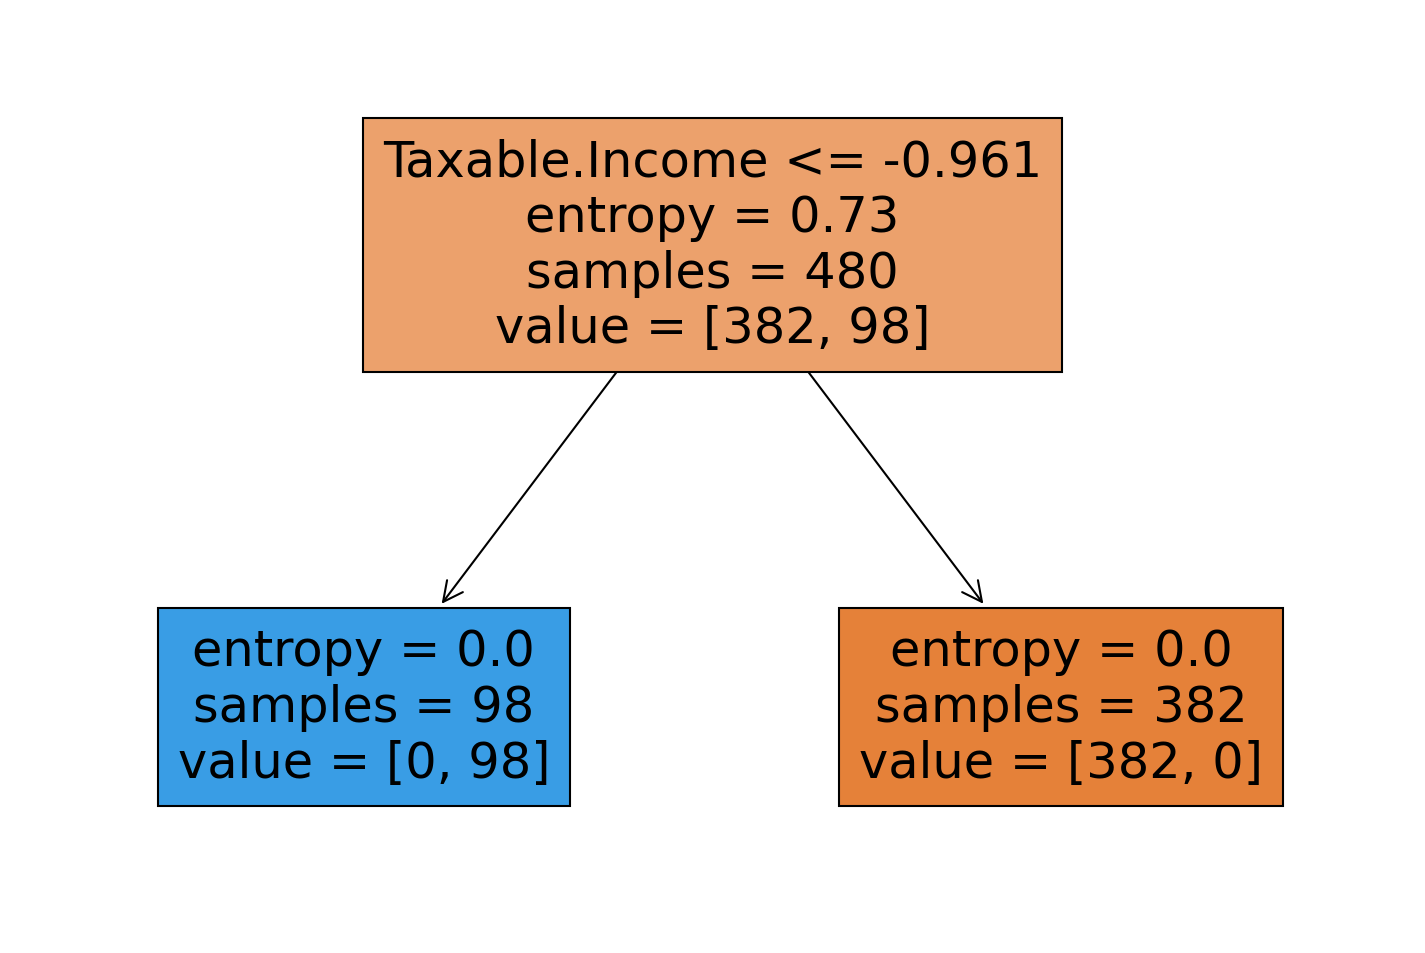

In [31]:
pruned_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
pruned_tree.fit(X_train,y_train)
report_model(pruned_tree)